In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_lyon_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('lyon')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/lyon_{date}.csv',index=False)
get_listings_lyon_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_lyon = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_lyon)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(lyon_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 8304 AirBnb listings.


In [4]:
lyon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2020-12.csv')
lyon_raw_df_12_12_2020.shape


(11496, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for lyon
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_lyon = glob.glob('lyon/**.csv')
files_lyon

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['lyon/Lyon_2021-08.csv',
 'lyon/Lyon_2021-09.csv',
 'lyon/Lyon_2020-12.csv',
 'lyon/Lyon_2021-02.csv',
 'lyon/Lyon_2021-03.csv',
 'lyon/Lyon_2021-01.csv',
 'lyon/Lyon_2021-04.csv',
 'lyon/Lyon_2021-10.csv',
 'lyon/Lyon_2021-07.csv',
 'lyon/Lyon_2021-06.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

lyon_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(lyon_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(lyon_raw_df_12_12_2020['price'].mean(),2)}.")

lyon_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(lyon_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_1_9_2021['price'].mean(),2)}.")

lyon_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(lyon_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_2_8_2021['price'].mean(),2)}.")

lyon_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(lyon_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_3_4_2021['price'].mean(),2)}.")

lyon_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(lyon_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_4_9_2021['price'].mean(),2)}.")

#lyon_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(lyon_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_5_19_2021['price'].mean(),2)}.")

lyon_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(lyon_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_6_3_2021['price'].mean(),2)}.")

lyon_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(lyon_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_7_4_2021['price'].mean(),2)}.")

lyon_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(lyon_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_8_6_2021['price'].mean(),2)}.")

lyon_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(lyon_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_9_7_2021['price'].mean(),2)}.")

lyon_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(lyon_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_10_6_2021['price'].mean(),2)}.")

#lyon_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/lyon_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(lyon_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(lyon_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 11496 AirBnb listings; the avg price is €92.6.
The 1_9_2021 dataset contains 11404 AirBnb listings; the avg price is €92.25.
The 2_8_2021 dataset contains 11376 AirBnb listings; the avg price is €91.55.
The 3_4_2021 dataset contains 11199 AirBnb listings; the avg price is €92.14.
The 4_9_2021 dataset contains 11195 AirBnb listings; the avg price is €92.81.
The 6_3_2021 dataset contains 10985 AirBnb listings; the avg price is €94.23.
The 7_4_2021 dataset contains 10921 AirBnb listings; the avg price is €95.03.
The 8_6_2021 dataset contains 10880 AirBnb listings; the avg price is €94.01.
The 9_7_2021 dataset contains 10420 AirBnb listings; the avg price is €95.03.
The 10_6_2021 dataset contains 8304 AirBnb listings; the avg price is €91.59.


In [7]:
df_list_lyon = [lyon_raw_df_12_12_2020, lyon_raw_df_1_9_2021, lyon_raw_df_2_8_2021,
           lyon_raw_df_3_4_2021, lyon_raw_df_4_9_2021, lyon_raw_df_6_3_2021, lyon_raw_df_7_4_2021,
           lyon_raw_df_8_6_2021, lyon_raw_df_9_7_2021, lyon_raw_df_10_6_2021]

dates_lyon = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_lyon = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_lyon = []

def airbnb_parse_lyon(df_list, files):
    for file in files_lyon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lyon/lyon_{file}.csv")
        print(f"The {file} lyon dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_lyon(df_list, dates):
    for file in files_lyon:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/lyon/lyon_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_lyon.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_lyon)

lyon_parse = airbnb_parse_lyon(df_list_lyon, files_lyon)


The 2020-12 lyon dataset contains 11496 AirBnb listings -- the avg price is €92.6.
The 2021-01 lyon dataset contains 11404 AirBnb listings -- the avg price is €92.25.
The 2021-02 lyon dataset contains 11376 AirBnb listings -- the avg price is €91.55.
The 2021-03 lyon dataset contains 11199 AirBnb listings -- the avg price is €92.14.
The 2021-04 lyon dataset contains 11195 AirBnb listings -- the avg price is €92.81.
The 2021-06 lyon dataset contains 10985 AirBnb listings -- the avg price is €94.23.
The 2021-07 lyon dataset contains 10921 AirBnb listings -- the avg price is €95.03.
The 2021-08 lyon dataset contains 10880 AirBnb listings -- the avg price is €94.01.
The 2021-09 lyon dataset contains 10420 AirBnb listings -- the avg price is €95.03.
The 2021-10 lyon dataset contains 8304 AirBnb listings -- the avg price is €91.59.


In [8]:
lyon_summary = airbnb_to_frame_lyon(df_list_lyon, files_lyon)
lyon_summary['Date of scrape'] = pd.to_datetime(lyon_summary['Date of scrape'])
lyon_summary['City'] = 'Lyon'

dfi.export(lyon_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/airbnb_lyon_summary.png")


In [9]:
master_df_lyon = pd.concat(df_list_lyon)
master_df_lyon_unique = master_df_lyon.drop_duplicates(subset='id')
master_df_lyon_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,56766,Amazing duplex-terrace in old Lyon,269557,Isabelle,NaN,5e Arrondissement,45.76321,4.82911,Entire home/apt,250,14,55,2018-09-04,0.45,1,195,NaN,NaN
1,71455,La Loge des Avocats - Vieux Lyon,365968,Daphné Et Vincent,NaN,5e Arrondissement,45.76206,4.82751,Entire home/apt,80,2,7,2018-11-18,0.12,1,246,NaN,NaN
2,77104,Nice Flat in the center of Lyon,411285,Clementine,NaN,1er Arrondissement,45.76962,4.82750,Entire home/apt,70,2,20,2020-06-30,0.59,1,363,NaN,NaN
3,134539,"Centre of old town,home sweet home",660135,Polali,NaN,5e Arrondissement,45.75930,4.82548,Entire home/apt,60,3,120,2020-09-30,5.32,1,0,NaN,NaN
4,136556,At home near Les Halles Paul Bocuse,668524,Nathalie,NaN,3e Arrondissement,45.76208,4.85327,Entire home/apt,99,3,10,2019-11-03,0.60,1,0,NaN,NaN


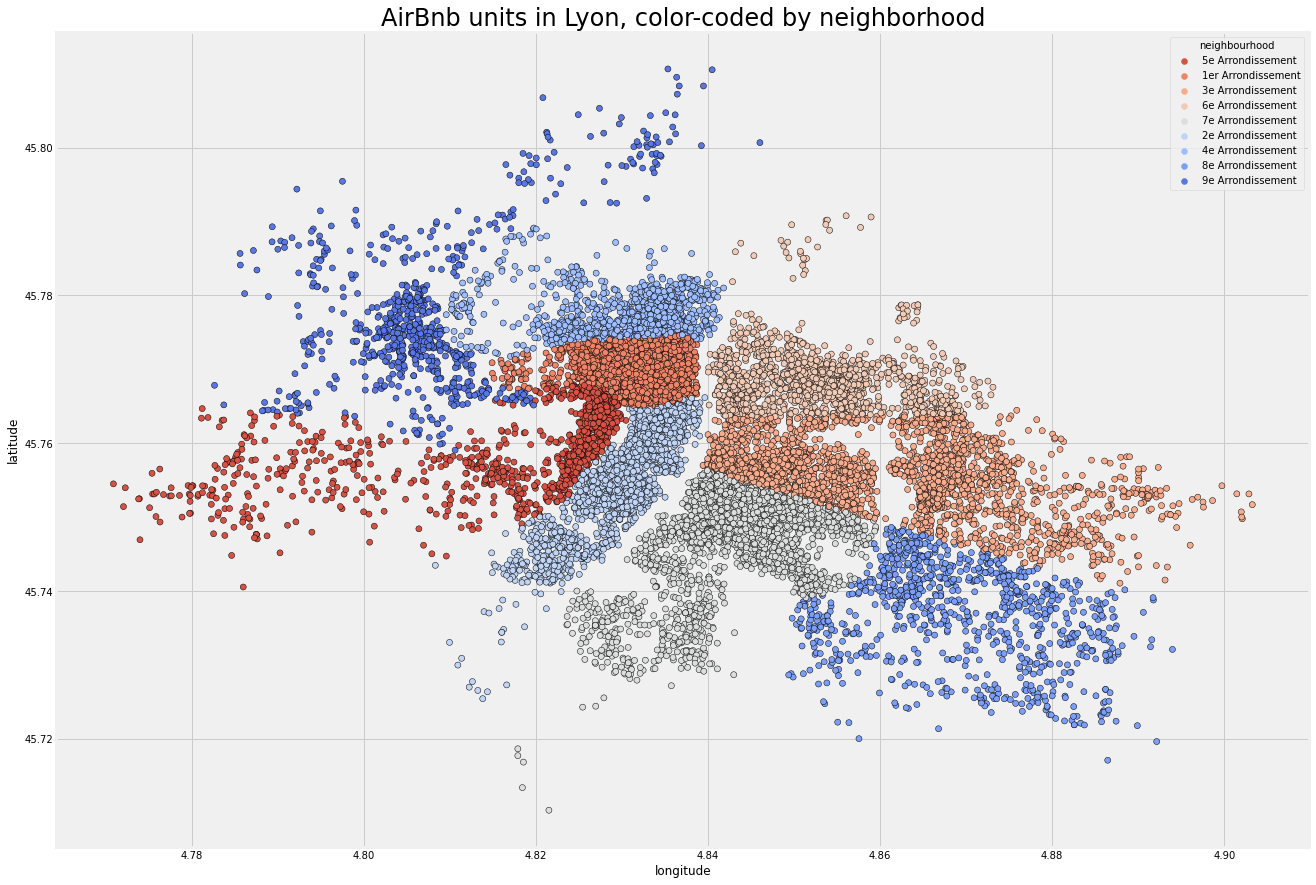

In [10]:
title = 'AirBnb units in Lyon, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_lyon_unique.longitude, master_df_lyon_unique.latitude, hue = master_df_lyon_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/airbnb_lyon_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([lyon_raw_df_10_6_2021,raw_df_lyon],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    3732
4    2367
3     624
6     567
1     472
5     299
0       1
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -22.77250782853595
Coefficients:  [ 12.73275774  27.13982119  -1.81350028   0.48298205  -6.05881693
   2.61755735  15.12312075  15.3692149  -21.29165401]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


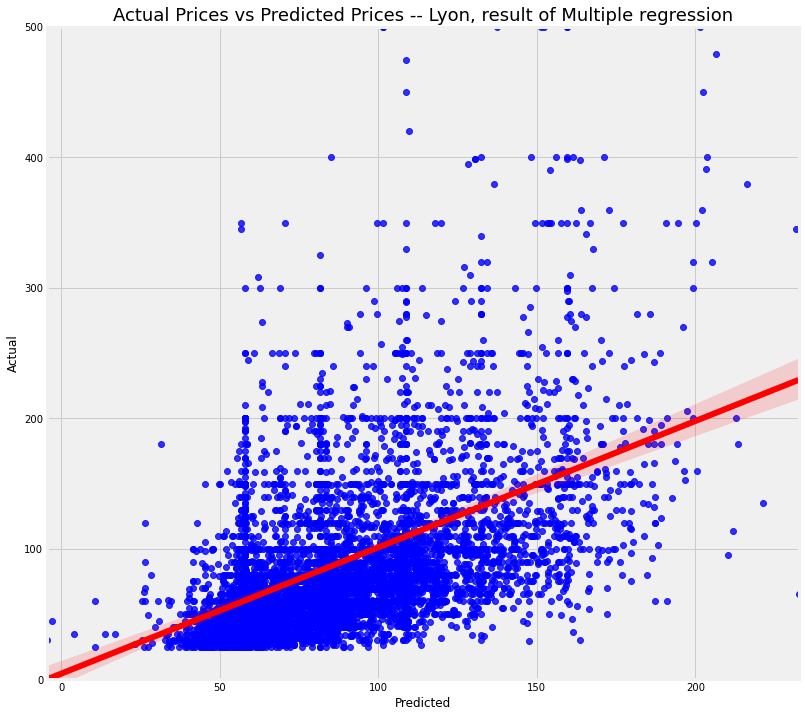

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Lyon, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/airbnb_lyon_multiple_regression.png')



In [18]:
df_result.shape

(6614, 3)

## The most mispriced [undervalued]

In [19]:
lyon_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
lyon_mispriced['%'] = (lyon_mispriced['Actual']/ lyon_mispriced['Predicted'] -1) *100
lyon_mispriced_perc = lyon_mispriced.sort_values(by=['%'], ascending=True)
lyon_mispriced_perc_plot = lyon_mispriced_perc.loc[(lyon_mispriced_perc['Predicted']>=1) & (lyon_mispriced_perc['Diff']>= 1)]
lyon_mispriced_perc_plot = lyon_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
lyon_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
1175,30,163.600765,133.600765,-81.662677
498,29,147.480854,118.480854,-80.336431
5604,36,161.494434,125.494434,-77.708210
1336,30,132.389110,102.389110,-77.339526
2473,26,113.530714,87.530714,-77.098708


In [20]:

lyon_mispriced_1 = raw_df_lyon.loc[raw_df_lyon.id==827]
lyon_mispriced_2 = raw_df_lyon.loc[raw_df_lyon.id==748]
lyon_mispriced_3 = raw_df_lyon.loc[raw_df_lyon.index==1308]
lyon_mispriced_4 = raw_df_lyon.loc[raw_df_lyon.index==1748]
lyon_mispriced_5 = raw_df_lyon.loc[raw_df_lyon.index==894]

In [21]:
id_array = [1175, 498, 5604, 1336, 2472]

lyon_mispriced_query = raw_df_lyon.query('index in @id_array')
lyon_mispriced_query = lyon_mispriced_query.rename({'index': 'id'}, axis=1)
lyon_mispriced_query.shape
#lyon_mispriced_query.head(1)

(5, 74)

In [22]:
#lyon_mispriced_neg = raw_df_lyon.loc[raw_df_lyon.index==4119]
lyon_mispriced_perc_1 = raw_df_lyon.loc[raw_df_lyon.id==7125]
lyon_mispriced_perc_2 = raw_df_lyon.loc[raw_df_lyon.id==3679]
lyon_mispriced_perc_3 = raw_df_lyon.loc[raw_df_lyon.id==8267]
lyon_mispriced_perc_4 = raw_df_lyon.loc[raw_df_lyon.id==2483]
lyon_mispriced_perc_5 = raw_df_lyon.loc[raw_df_lyon.id==3449]

In [23]:
lyon_mispriced = lyon_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
lyon_mispriced_1 = lyon_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

lyon_mispriced_1[:1]
lyon_mispriced_1[:2]
lyon_mispriced_1[:3]
lyon_mispriced_1[:4]
lyon_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
498,4592558,$29.00,5.00,5.00,5.00,5.0,5.00,5.00,NaN,https://www.airbnb.com/rooms/4592558
1175,8693795,$30.00,1.00,4.00,5.00,1.0,5.00,1.00,"Lyon, Rhône-Alpes, France",https://www.airbnb.com/rooms/8693795
1336,9182461,$30.00,NaN,NaN,NaN,NaN,NaN,NaN,"Lyon, Rhône-Alpes, France",https://www.airbnb.com/rooms/9182461
2472,15126403,$40.00,4.67,5.00,4.33,5.0,5.00,5.00,"Lyon, Auvergne-Rhône-Alpes, France",https://www.airbnb.com/rooms/15126403
5604,35556079,$36.00,4.71,4.95,4.81,5.0,4.95,4.76,NaN,https://www.airbnb.com/rooms/35556079


In [24]:
dfi.export(lyon_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/airbnb_lyon_mispriced.png")



## The best score

In [25]:
lyon_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
lyon_high_value.head(6)

,Actual,Predicted,Diff
421,65,232.481441,167.481441
6805,345,231.551211,-113.448789
6078,518,229.500855,-288.499145
5373,135,221.407036,86.407036
6180,380,216.152276,-163.847724
6417,180,213.401506,33.401506


In [26]:
id_array = [421, 6805, 6078, 5373, 6180, 6417]

lyon_best_score_query = raw_df_lyon.query('index in @id_array')
lyon_best_score_query = lyon_best_score_query.rename({'index': 'id'}, axis=1)
#lyon_best_score_query.head(1)

In [27]:
lyon_best_score = lyon_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
lyon_best_score_1 = lyon_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

lyon_best_score_1[:1]
lyon_best_score_1[:2]
lyon_best_score_1[:3]
lyon_best_score_1[:4]
lyon_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
421,4472773,$65.00,4.71,4.76,4.48,4.81,4.86,4.57,NaN,https://www.airbnb.com/rooms/4472773
5373,33352969,$135.00,4.00,4.00,5.00,5.00,5.00,4.00,"Lyon, Auvergne-Rhône-Alpes, France",https://www.airbnb.com/rooms/33352969
6078,39427983,$518.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/39427983
6180,39840677,$380.00,5.00,5.00,5.00,5.00,5.00,4.00,"Lyon, Auvergne-Rhône-Alpes, France",https://www.airbnb.com/rooms/39840677
6417,40341819,$180.00,5.00,4.00,3.00,4.00,5.00,3.00,"Lyon, Auvergne-Rhône-Alpes, France",https://www.airbnb.com/rooms/40341819


In [28]:
dfi.export(lyon_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/lyon/airbnb_lyon_best_score.png")


